# Exploring Titanic dataset in Python

In this notebook, I will be exploring the Titanic dataset using pandas(for data ingestion and cleaning), matplotlib(for visualizations) and scikit-learn(for machine learning). 

### Importing data and creating dataframes

In [1]:
#Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Creating train and test dataframes 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [4]:
#First 5 rows of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#First 5 rows of the test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Merging train and test dataframes into a single dataframe
titanic=pd.concat([train,test],axis=0,ignore_index=True)

In [7]:
#Total number of values in each column
titanic.count()

Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

### Exploratory Data Analysis

This part would help us in identifying patterns within the data and thus in extracting, creating the most relevant features.

In [8]:
#Converting the unordered categorical 'Sex'
titanic.Sex=titanic.Sex.map({'male':1,'female':0})

In [9]:
#Total number of passengers and survivors by gender
train.groupby('Sex')['Survived'].agg({'Sex':['count'],'Survived':['sum']})

,Sex,Survived
,count,sum
Sex,,
female,314,233
male,577,109


233 survivors out of 314 female passengers and
109 survivors out of 577 male passengers

In [10]:
titanic.loc[train.index].info() #Training set Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB


In [11]:
titanic.loc[train.index].describe() #Properties of the training set

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.647587,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,0.477990,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,1.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000,1.000000


In [12]:
#Creating a new feature 'has_Family'
#'has_Family' tells if a passenger is part of a family or not
titanic['has_Family']=((titanic.Parch!=0) | (titanic.SibSp!=0)).map({True:1,False:0})

In [13]:
titanic.has_Family.value_counts()

0    790
1    519
Name: has_Family, dtype: int64

519 Passengers(from the entire dataset) are travelling with their families.

In [14]:
#Does travelling with family increase the survival chances?
titanic.loc[train.index].groupby('has_Family')['has_Family','Survived'].agg({'has_Family':['count'],'Survived':['sum']})

,has_Family,Survived
,count,sum
has_Family,,
0,537,163.0
1,354,179.0


From the training set,
out of 354 people travelling with their families 179 survived. Out of 537 people travelling without families, 163 survived.

([<matplotlib.axis.XTick at 0x16618222240>,
 <a list of 2 Text xticklabel objects>)

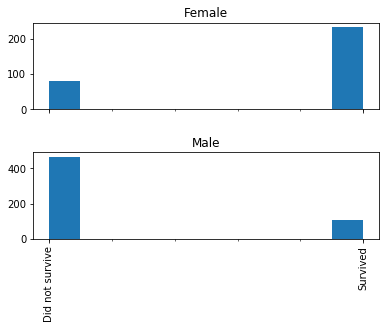

In [15]:
#Visualizing survival by gender
titanic.loc[train.index].Survived.hist(by=titanic.Sex.map({0:'Female',1:'Male'}),layout=(2,1),sharex=True)
plt.xticks([0,1],['Did not survive','Survived'])

([<matplotlib.axis.XTick at 0x16618658f28>,
 <a list of 2 Text xticklabel objects>)

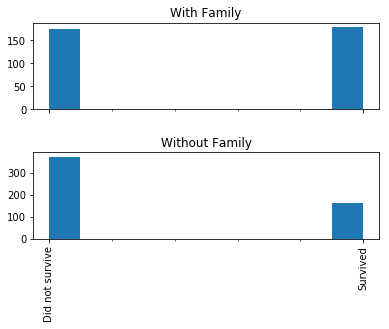

In [16]:
#Visualizing survival by has_Family
titanic.loc[train.index].Survived.hist(by=titanic.has_Family.map({0:'Without Family',1:'With Family'}),layout=(2,1),sharex=True)
plt.xticks([0,1],['Did not survive','Survived'])

([<matplotlib.axis.XTick at 0x166188478d0>,
 <a list of 2 Text xticklabel objects>)

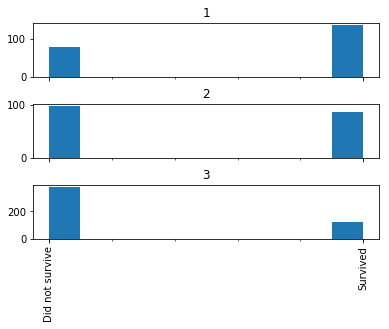

In [17]:
#Visualizing survival by Pclass
train.Survived.hist(by=train.Pclass,layout=(3,1),sharex=True)
plt.xticks([0,1],['Did not survive','Survived'])

([<matplotlib.axis.XTick at 0x166185c0748>,
 <a list of 2 Text xticklabel objects>)

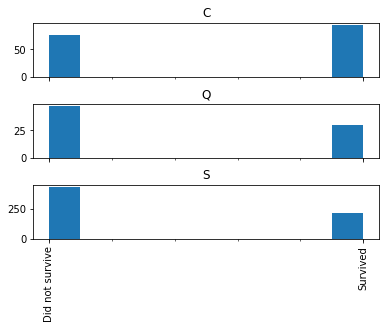

In [18]:
titanic.loc[train.index].Survived.hist(by=titanic.Embarked,layout=(3,1),sharex=True)
plt.xticks([0,1],['Did not survive','Survived'])

In [19]:
#Importing colormap
import matplotlib.cm as cm

([<matplotlib.axis.XTick at 0x16618bb3630>,
 <a list of 10 Text xticklabel objects>)

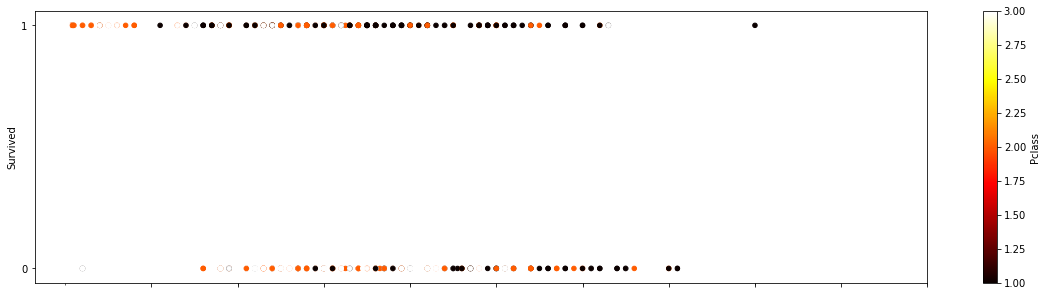

In [20]:
#Scatterplot to visualize relationship between Age,Pclass and Survival
titanic.loc[train.index].plot(x='Age',y='Survived',c='Pclass',cmap=cm.hot,kind='scatter',figsize=(20,5))
plt.yticks([0,1])
plt.xticks(range(10,101,10))


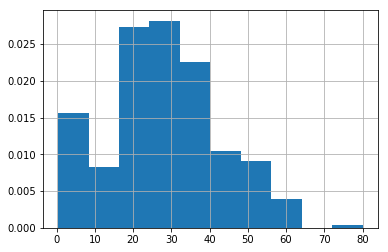

In [21]:
#Visualizing age distribution
train[train.Survived==1].Age.hist(bins=10,normed=True)

In [22]:
#Embarked has two missing values -> Deleting those two rows
titanic.dropna(subset=['Embarked'],inplace=True)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
Age            1044 non-null float64
Cabin          293 non-null object
Embarked       1307 non-null object
Fare           1306 non-null float64
Name           1307 non-null object
Parch          1307 non-null int64
PassengerId    1307 non-null int64
Pclass         1307 non-null int64
Sex            1307 non-null int64
SibSp          1307 non-null int64
Survived       889 non-null float64
Ticket         1307 non-null object
has_Family     1307 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 143.0+ KB


In [24]:
#Imputing missing Age values with the mean Age
titanic.Age=titanic.Age.fillna(value=train.Age.mean())

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
Age            1307 non-null float64
Cabin          293 non-null object
Embarked       1307 non-null object
Fare           1306 non-null float64
Name           1307 non-null object
Parch          1307 non-null int64
PassengerId    1307 non-null int64
Pclass         1307 non-null int64
Sex            1307 non-null int64
SibSp          1307 non-null int64
Survived       889 non-null float64
Ticket         1307 non-null object
has_Family     1307 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 143.0+ KB


In [26]:
#Since Cabin doesn't seem like an important feature, we're dropping it
titanic.drop('Cabin',axis=1)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_Family
0,22.000000,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1
1,38.000000,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1
2,26.000000,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0
3,35.000000,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,1
4,35.000000,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0
5,29.699118,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,0
6,54.000000,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,0
7,2.000000,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,1
8,27.000000,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1.0,347742,1
9,14.000000,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1.0,237736,1


In [27]:
#Using get_dummmies() method to convert Embarked into variables that can be used as features 
embarked_dummies=pd.get_dummies(titanic.Embarked,prefix='Embarked')

Embarked is a non-binary unordered categorical.

In [28]:
#Adding embarked_dummies to the titanic dataframe
titanic=pd.concat([titanic,embarked_dummies],axis=1)

In [29]:
#Data with the new columns
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,has_Family,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,1,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,1,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0,0,1


### Predicting Survivors using Logistic Regression

In [30]:
#Selecting our features
features=['Pclass','Sex','Age','has_Family','Embarked_C','Embarked_Q','Embarked_S']


In [31]:
#Training set
X_train=titanic[titanic.Survived.notnull()][features]  #Features
y_train=titanic[titanic.Survived.notnull()].Survived  #Response

In [32]:
#Test set
X_test=titanic[titanic.Survived.isnull()][features]

In [33]:
#Using Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
#Prediction
y_pred_class=logreg.predict(X_test)

Thank you for going through the notebook. Comments and suggestions are welcome :)